In [1]:
import pandas as pd

#reading the imdb_df pickle 

imdb_df=pd.read_pickle('pickledfiles/imdb_df.pkl')

imdb_df.shape

(50000, 2)

In [2]:
def clinic_all_clean (mess):
    
    import string
    import re
    from nltk.corpus import stopwords
    from nltk import pos_tag
   
    from nltk.stem import WordNetLemmatizer
    from nltk.stem.porter import PorterStemmer 

    
    '''this function does the following:
        > it makes word lower case
        > it removes word containg numbers
        1. it removes words inside <> like <br>
        2. it removes punctuations 
        3. it removes stopwords 
        4. it stemmers
        5. it lemmatize
    '''
    
  
    
    mess = mess.lower()                 # make lowercase
    
    mess = re.sub(r'[^\x00-\x7F]+','', mess) # remove non ascii character 
    
    mess = re.sub('\(.*?\)', '', mess) # removes words like latin words (El Monte de las brujas)  that are inside ( )
    
    mess = re.sub('\<.*?\>', '', mess) # removes words like br that are inside < >
    
    mess = re.sub('\w*\d\w*', '', mess) # removes words containg  numbers
    
    nopunc = [x for x in mess if x not in string.punctuation] # remove all punc
     # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    stpwrd = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    
    # now it stemmers 
    stem = PorterStemmer()
    stem_w =[stem.stem(wrd) for wrd in stpwrd]
    
    
    # now its lemmatizes
    wnl = WordNetLemmatizer()
    lem_txt=[wnl.lemmatize(i,j[0].lower()) if j[0].lower() in ['a','n','v'] else wnl.lemmatize(i) for i,j in pos_tag(stem_w)]
    
    return ' '.join(lem_txt) # removing join returns list of words aka bag of words 

lets try the above function on small dataframe to see if its working as expected 

In [3]:
small_df=imdb_df.loc[:10]
small_df['cleaned_review']=small_df.review.apply(clinic_all_clean)
small_df

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,review,label,cleaned_review
0,Forget everything that you have ever read abou...,positive,forget everyth ever read mallachi brother stra...
1,"Quirky, independent, theatrical, Christian Sla...",negative,quirki independ theatric christian slaterthes ...
2,This is a poorly written and badly directed sh...,negative,poorli write badli direct short film pure simp...
3,I can't add an awful lot to the positive revie...,positive,cant add aw lot posit review alreadi great act...
4,"When I was in 7th grade(back in 1977), I was a...",positive,grade ask read novel base part english class s...
5,"I loved ""The Curse of Frankenstein"" so much th...",negative,love curs frankenstein much rush get frankenst...
6,Michael Jackson is not very popular in USA any...,positive,michael jackson popular usa anymor howev europ...
7,Nicole Kidman is a wonderful actress and here ...,positive,nicol kidman wonder actress she great realli l...
8,This was yet another big screen outing for a U...,negative,yet anoth big screen out u tv show sixti amus ...
9,This movie is one of my very favorites. It's h...,positive,movi one favorit hard explain mayb innoc corin...


In [4]:
small_df.review[0]

'Forget everything that you have ever read about the Mallachi Brothers\' straight-to-video release "Snakes on a Train," especially if it was a negative review. This movie is way more fun than the movie that it obviously rips off: "Snakes on a Plane." Frankly, I am surprised that more people aren\'t rhapsodizing about this low-budget Asylum Release. Instead, most reviews that I\'ve read have nothing kind or critically worthwhile to say except the usual stupid herd mentality idiocy, such as the acting was amateurish, the action didn\'t numerically live up to the advertising, and the entire thing amounted to a hideous waste of time. Of course, it doesn\'t help that the title is a tip-off to the obvious rip-off nature of this film. Actually, I felt that "Snakes on a Train" surpassed "Snakes on a Plane" for a number of reasons.<br /><br />First, the producers used real, genuine snakes until the last fifteen minutes when they substituted either giant fake snake heads or computer generated a 

In [5]:
small_df.cleaned_review[0]

'forget everyth ever read mallachi brother straighttovideo releas snake train especi neg review movi way fun movi obvious rip snake plane frankli surpris peopl arent rhapsod lowbudget asylum releas instead review ive read noth kind critic worthwhil say except usual stupid herd mental idioci act amateurish action didnt numer live advertis entir thing amount hideou wast time cours doesnt help titl tipoff obviou ripoff natur film actual felt snake train surpass snake plane number reasonsfirst produc use real genuin snake last fifteen minut substitut either giant fake snake head comput gener supergi snake consum entir amtrak like train mani movi snake gobbl train result snake train rank first movi scale heightsecond lowbudget movi employ grisli grossout effect woman cough babi snakesr oneswa fantast special effect forearm get tore later movi visual entic also get see littl white girl get eat aliv snake cute could year old thereabout die scream way nasti ol giant mister snake head swallow k

now that cleaning works as expected lets run in on entire dataframe and wait **an hour** while it runs 

<span style="color:orange"> # **caution**  </span > uncomment the lines below at the risk of waiting an hour to complete  

In [6]:
clean_imdb_df = imdb_df.copy(deep=True)# creating copy just in case

clean_imdb_df['cleaned_review']=clean_imdb_df.review.apply(clinic_all_clean)

clean_imdb_df.to_pickle("pickledfiles/clean_imdb_df")

In [8]:
clean_imdb_df = pd.read_pickle('pickledfiles/clean_imdb_df')

In [9]:
clean_imdb_df.head()

,review,label,cleaned_review
0,Forget everything that you have ever read abou...,positive,forget everyth ever read mallachi brother stra...
1,"Quirky, independent, theatrical, Christian Sla...",negative,quirki independ theatric christian slaterthes ...
2,This is a poorly written and badly directed sh...,negative,poorli write badli direct short film pure simp...
3,I can't add an awful lot to the positive revie...,positive,cant add aw lot posit review alreadi great act...
4,"When I was in 7th grade(back in 1977), I was a...",positive,grade ask read novel base part english class s...


now that **cleaning is done** lets move ahead to **feature selection**


# Select Features

>Feature selection is a process where you automatically select those features in your data that contribute most to the prediction variable or output in which you are interested.

so which method do we use? 
>An [extra-trees classifier.](.https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html#sklearn.ensemble.ExtraTreesClassifier)
>This class implements a meta estimator that fits a number of randomized decision trees (a.k.a. extra-trees) on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting

In [10]:
def feature_select (df):
    '''
    _Author_: jayson 

    this function takes in dataframe(df) as input
    uses df.cleaned_review as x 
    and df.label as y 
    for fitting it to ExtraTreesClassifier
    and returns a list containg words with high importance 
    '''

    from sklearn.feature_extraction.text import CountVectorizer
    from sklearn.preprocessing import LabelEncoder
    from sklearn.ensemble import ExtraTreesClassifier
    import numpy as np

    # creating inputs for  ExtraTreesClassifier

    cv= CountVectorizer()
    x = cv.fit_transform(df.cleaned_review) # note that i have used column name 

    le=LabelEncoder()
    y = le.fit_transform(df.label)

    # ExtraTreesClassifier
    ex_tree = ExtraTreesClassifier()
    ex_tree.fit(x,y)

    # creating the list of words with non zero value
    # importance 
    imp = ex_tree.feature_importances_
    # feature_names
    feat_names = cv.get_feature_names()

    # joining imporatance and feature_names
    feat_imp_dic= dict(zip(feat_names,imp))
    # sorting in descending order based on value of importance 
    sorted_list = sorted(feat_imp_dic.items(),key=lambda val: val[1]  ,reverse=True)
    # sorting only importance in descending order
    number_list = sorted(imp,reverse=True)


    # now getting the number after which importance is zero 
    n=0
    for i in number_list:
        if i > 0 :
            n+=1
    # finally to export the features with zero importance 
    feature_list=[]
    for f in range(n):
        feature_list.append(sorted_list[f][0])
    
    return feature_list

    



###  <span style="color:orange">  creating word list </span>that contains feature selected words

In [11]:
word_list = feature_select(clean_imdb_df[['cleaned_review','label']])
#' '.join (feature_word_list)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


####  <span style="color:orange"> # **caution**  </span > time consuming code below 
> use pickle instead 

In [12]:
##now that we have word_list lets create a row of this feature selectd words for each document 
c = 0
for line in clean_imdb_df['cleaned_review']:
    line = [word for word in line.lower().split() if word in word_list ] #creates a list of words that are present in word_list
    line = ' '.join(line) 
    clean_imdb_df.loc[c,'feature_selected'] = line 
    c +=1

In [13]:
clean_imdb_df.to_pickle('pickledfiles/cl_fs_imdb_df.pkl')

In [14]:
import pandas as pd
fs_imdb_df = pd.read_pickle('pickledfiles/cl_fs_imdb_df.pkl')

##  this completes phase 1 
    ---------------------------------------------------

## **Phase 2** 
>  . For labelled data, find the most common words associated with each category (positive & negative)
    . Discover the lowest frequency and highest frequency words
   
Extra Credits

   > .  Repeat visualization step 1 & 2 after feature selection and note the impact (Bonus)
     


In [15]:
# most common words  for negative
df_mc =  fs_imdb_df[['cleaned_review','label']]

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
cv_neg = cv.fit_transform(df_mc[df_mc.label.isin(['negative'])].cleaned_review)

mc_neg =pd.DataFrame(cv_neg.sum(axis=0),columns=list(cv.get_feature_names()),index=['freq'])

mc_neg=mc_neg.transpose()

mc_neg.nlargest(20,'freq')

,freq
movi,54857
film,42014
one,24526
make,23216
like,22857
see,18710
get,18491
watch,14295
even,14288
good,13875


In [16]:
# most common words  for positive
df_mc =  fs_imdb_df[['cleaned_review','label']]

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
cv_pos = cv.fit_transform(df_mc[df_mc.label.isin(['positive'])].cleaned_review)

mc_pos =pd.DataFrame(cv_pos.sum(axis=0),columns=list(cv.get_feature_names()),index=['freq'])

mc_pos=mc_pos.transpose()

mc_pos.nlargest(20,'freq')

,freq
film,47897
movi,42420
one,25933
see,20661
make,19721
like,19068
get,15323
time,14919
good,14220
stori,13453


In [17]:
# for negative words 
a=mc_neg.nsmallest(1,'freq')
b=mc_neg.nlargest(1,'freq')
print('\n the lowest frequency negative word is :', a ,sep='\n')

print('\n the highest frequency negative word is :', b ,sep='\n')


 the lowest frequency negative word is :
                            freq
aaaaaaaaaaaahhhhhhhhhhhhhh     1

 the highest frequency negative word is :
       freq
movi  54857


In [18]:
# for positive words 
a=mc_pos.nsmallest(1,'freq')
b=mc_pos.nlargest(1,'freq')
print('\n the lowest frequency positive word is :', a ,sep='\n')

print('\n the highest frequency positive word is :', b ,sep='\n')


 the lowest frequency positive word is :
             freq
aaaaaaaargh     1

 the highest frequency positive word is :
       freq
film  47897


###### Extra Credits

    > Read unlabeled data from respective folder (unsup) and store in unsup_df
    
   > this step is already performed in part 1 notebook we have pickled it aswell so would import picked file next 
   

> #### Create a cluster to separate positive and negative words (bonus) using k-means algorithm

In [19]:
import pandas as pd

document=pd.read_pickle('pickledfiles/unsup_df.pkl')
document_ = ''.join(document.review)# joins all reviews of all rows into a single large string
document.head(5) # it is cleaned document devoid of stopword lemetized and stuff

,review
0,"I admit, the great majority of films released ..."
1,"Take a low budget, inexperienced actors doubli..."
2,"Everybody has seen 'Back To The Future,' right..."
3,Doris Day was an icon of beauty in singing and...
4,"After a series of silly, fun-loving movies, 19..."


In [20]:
from textblob import TextBlob
from nltk.corpus import stopwords
import string
import numpy as np
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
from sklearn import cluster
import re

def create_polarity_vector(all_adjectives):
    # NLTK Vader sentiment analyzer
    sid = SentimentIntensityAnalyzer()

    #Taking compound score as one feature, (compund score = -ve indicates negative sentiments)
    #(compund score = +ve indicates positive sentiments, ie compound value is normalization b/w +ve and -ve)
    feature_vector=[1 if sid.polarity_scores(i)['compound']>=0 else -1 for i in all_adjectives]
    
    return feature_vector



# utility function to extract all adjectives from text document
def extract_adjectives(text):
    tokenized_text= nltk.word_tokenize(text) # tokenizes sentences to words 
    tagged_text = nltk.pos_tag(tokenized_text) # creates tag for each word 
    all_adjectives = list({i[0] for i in tagged_text if i[1] == 'JJ'}) #JJ: adjective or numeral, ordinal
    return all_adjectives

# Cleaning up text  # does not lemma and steming as it may hinder getting proper tag 
def clean_text(text):    
    
    text = text.lower()                 # make lowercase
    
    text = re.sub('\<.*?\>', '', text) # removes words like br that are inside < >
    
    text = re.sub('\w*\d\w*', '', text) # removes words containg  numbers
    
    #stopword removal
    stop_word=list(stopwords.words('english'))
    toke=list(text.split(' '))
    text = ' '.join([i for i in toke if i not in stop_word])
    
    #punctutaion removal
    t_lator=str.maketrans('','',string.punctuation)
    text=text.translate(t_lator)
    remove_digits = str.maketrans('', '', string.digits)
    text = text.translate(remove_digits)    
    
    #removing special symbol
    for i in '“”—':
        text = text.replace(i, ' ')
        
    return text


C:\ProgramData\Anaconda3\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [21]:
text= clean_text(document_)
text[:500]

'admit great majority films released say  me dozen major silents viewed one loved the crowd two good the last command city lights latter chaplin circa so apprehensive one humor often difficult appreciate uh enjoy decades later like lead actors thought little filmone intriguing sequence early on guys supposed get deloused three minutes fully dressed schtick background perhaps three dozen men pass by naked white black wwi  most butts part full backside shown early variation beefcake courtesy howard'

caution time consuming cell below 

In [22]:
adjectives=extract_adjectives(text)

import pickle
with open('pickledfiles/adjj_of_unsup_df.pkl', 'wb') as f:
    pickle.dump(adjectives, f)
 

 #import pickle
with open('pickledfiles/adjj_of_unsup_df.pkl', 'rb') as f:
            adjectives = pickle.load(f)


In [23]:
adjectives[:4]

['upstart', 'clothesone', 'prideful', 'kevin']

In [24]:
#features = adjectives.apply(create_polarity_vector)
# # Preparing our feature vector
features = create_polarity_vector(adjectives)

In [25]:
# Making clusters using KMeans
feature_ = np.array(features).reshape(-1,1)
kmeans = cluster.KMeans(n_clusters=2, n_init=200)
kmeans.fit(feature_)
labels = kmeans.predict(feature_)

In [26]:
# Identifying positive and negative terms

type1_terms,type2_terms = [], []

for i,j in zip(adjectives,labels):
    if j == 0 :
        type1_terms.append(i)
    else:
        type2_terms.append(i)
        
#print(type1_terms)

#print(type2_terms)

In [27]:
type1_terms[:20]

['upstart',
 'clothesone',
 'prideful',
 'kevin',
 'notyou',
 'thimble',
 'gowere',
 'misfit',
 'humortyrone',
 'ndh',
 'handsthis',
 'lowlevel',
 'cinevegas',
 'stoppersmy',
 'donlevy',
 'erected',
 'showingi',
 'sport',
 'hatbox',
 'embarrassmentwhile']

In [28]:
type2_terms[:20]

['drunk',
 'tense',
 'warsaw',
 'contentious',
 'dick',
 'warring',
 'troublesome',
 'pissed',
 'funeral',
 'punisher',
 'whore',
 'loner',
 'stench',
 'feared',
 'hate',
 'sick',
 'offensive',
 'cutting',
 'fascist',
 'dislikes']

# this completes phase 2 
lets move on to phase 3 
     ----------------------------------------------------------------------------

## Phase 3 Visualization:

Each student must solve

    .Create a word cloud with positive and negative words after cleansing
    .Visualise the positive and negative words distribution (Hint: Histogram)


-------------------------------------------------------------------------------------------------

#### custom stopword list
to remove later 

In [29]:
# here we add  most common words that have frequency greater then 15000 to stopwords 

pos_count=mc_pos.sort_values(by='freq',ascending=False)['freq']
pos_count[pos_count>15000]
l = [w for w in pos_count[pos_count>15000].index]


neg_count=mc_neg.sort_values(by='freq',ascending=False)['freq']
neg_count[neg_count>15000]
m = [w for w in neg_count[neg_count>15000].index]


l.extend(m)

def getUniqueWords(allWords) :
    uniqueWords = [] 
    for i in allWords:
        if not i in uniqueWords:
            uniqueWords.append(i)
    return uniqueWords


added_stopwrds=getUniqueWords(l) # custom words to remove later 
#k=['show','charact']

added_stopwrds.extend(w for w in ['show','charact'])# manually added characters that were common in both 
added_stopwrds

['film', 'movi', 'one', 'see', 'make', 'like', 'get', 'show', 'charact']

---------------------------------------------------------------------------------------

In [30]:
#cleaned negative review
clean_neg_review = fs_imdb_df[fs_imdb_df.label.isin(['negative'])]['cleaned_review']
#cleaned positive review
clean_pos_review = fs_imdb_df[fs_imdb_df.label.isin(['positive'])]['cleaned_review']

###-------------------------------------------------------

#feature selected negative review 
fs_neg_review = fs_imdb_df[fs_imdb_df.label.isin(['negative'])]['feature_selected']
#feature selected positive review 
fs_pos_review = fs_imdb_df[fs_imdb_df.label.isin(['positive'])]['feature_selected']


## creating word cloud before feature selection 

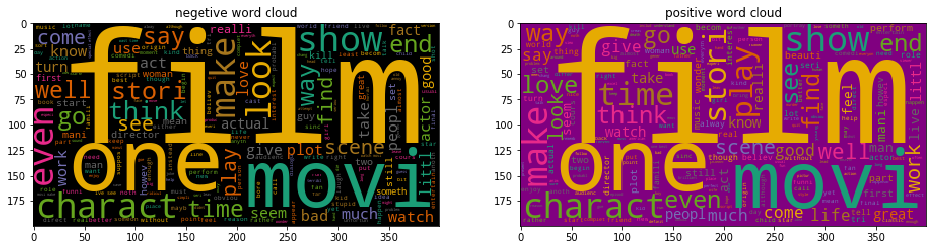

In [34]:
import matplotlib.pyplot as plt 
from wordcloud import WordCloud

wc = WordCloud(background_color="black", colormap="Dark2",
               max_font_size=150, random_state=42)

l =wc.generate(''.join(clean_neg_review))

wc = WordCloud(background_color="purple", colormap="Dark2",
               max_font_size=150, random_state=42)

m =wc.generate(''.join(clean_pos_review))
#----------------------------------------
#
plt.figure(figsize=(16,9))
plt.subplot(1,2,1)

plt.title('negetive word cloud')
plt.imshow(l)
#show()

plt.subplot(1,2,2)
#
plt.title('positive word cloud')
plt.imshow(m)

plt.show()

## creating word_cloud after feature selection 
    > well without removing addition stopwords(added_stopwrds) the difference was subtle but not prominent 
    > so added stopwords=added_stopwrds aswell 

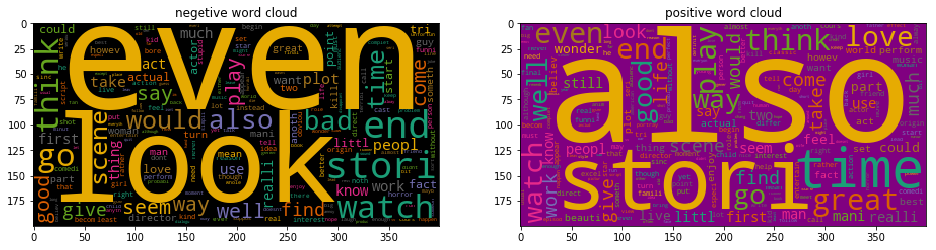

In [35]:
# creating word cloud after feature selection 
from wordcloud import WordCloud

wc = WordCloud(stopwords=added_stopwrds,background_color="black", colormap="Dark2",
               max_font_size=150, random_state=42)

l =wc.generate(''.join(fs_neg_review))

wc = WordCloud(stopwords=added_stopwrds,background_color="purple", colormap="Dark2",
               max_font_size=150, random_state=42)

m =wc.generate(''.join(fs_pos_review))
#----------------------------------------
#
plt.figure(figsize=(16,9))
plt.subplot(1,2,1)

plt.title('negetive word cloud')
plt.imshow(l)
#show()

plt.subplot(1,2,2)
#
plt.title('positive word cloud')
plt.imshow(m)

plt.show()

----------------------------------------------------------------------------------

In [36]:
# function to remove addition stopwords 
def added_stopwrd_remover(word):
    
    stpwrd = [w for w in word.split() if word.lower() not in added_stopwrds]
    
    return ' '.join(stpwrd)

# creating HIStogram before feature selection 

In [37]:
# cleaned negative words
df_mc =  fs_imdb_df[['cleaned_review','label']]
#---------------------------
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(analyzer='word')
cv_neg = cv.fit_transform(df_mc[df_mc.label.isin(['negative'])].cleaned_review)
##
mc_neg =pd.DataFrame(cv_neg.sum(axis=0),columns=list(cv.get_feature_names()),index=['freq'])
mc_neg=mc_neg.transpose()
#--------------------------------

##------------------------------------------------------
# cleaned positive words
#---------------------------
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(analyzer='word')
cv_pos = cv.fit_transform(df_mc[df_mc.label.isin(['positive'])].cleaned_review)
##
mc_pos =pd.DataFrame(cv_pos.sum(axis=0),columns=list(cv.get_feature_names()),index=['freq'])
mc_pos=mc_pos.transpose()
#--------------------------------


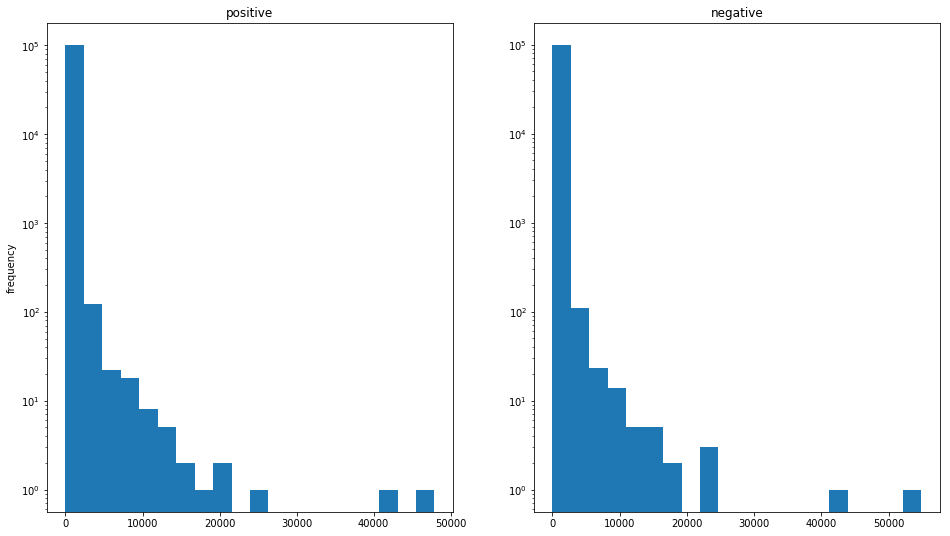

In [38]:
#visualizing
import matplotlib.pyplot as plt
from pylab import * 

#data
neg_data=mc_neg['freq'].tolist()
pos_data=mc_pos['freq'].tolist()

#figures 
plt.figure(figsize=(16,9)) 

subplot(1,2,1)
title('positive')
plt.ylabel('frequency')
plt.hist(pos_data,log=True,bins=20)
 
subplot(1,2,2)

title('negative')
plt.hist(neg_data,log=True,bins=20)
plt.axis('auto')
show()

# creating histogrm after feature selection and even removing addition few common words 

In [39]:
# cleaned and feature selected  negative words
df_mc =  fs_imdb_df[['feature_selected','label']]
#---# removing custom stopwords from feature selected words in hope to make hist better
df_mc['removed_adstp_wrds']=df_mc.feature_selected.apply(added_stopwrd_remover)
#---------------------------
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(analyzer='word')
cv_neg = cv.fit_transform(df_mc[df_mc.label.isin(['negative'])].removed_adstp_wrds)
##
mc_neg =pd.DataFrame(cv_neg.sum(axis=0),columns=list(cv.get_feature_names()),index=['freq'])
mc_neg=mc_neg.transpose()
#--------------------------------

##------------------------------------------------------
# cleaned and feature selected  positive words
#---------------------------
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(analyzer='word')
cv_pos = cv.fit_transform(df_mc[df_mc.label.isin(['positive'])].removed_adstp_wrds)
##
mc_pos =pd.DataFrame(cv_pos.sum(axis=0),columns=list(cv.get_feature_names()),index=['freq'])
mc_pos=mc_pos.transpose()
#--------------------------------


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


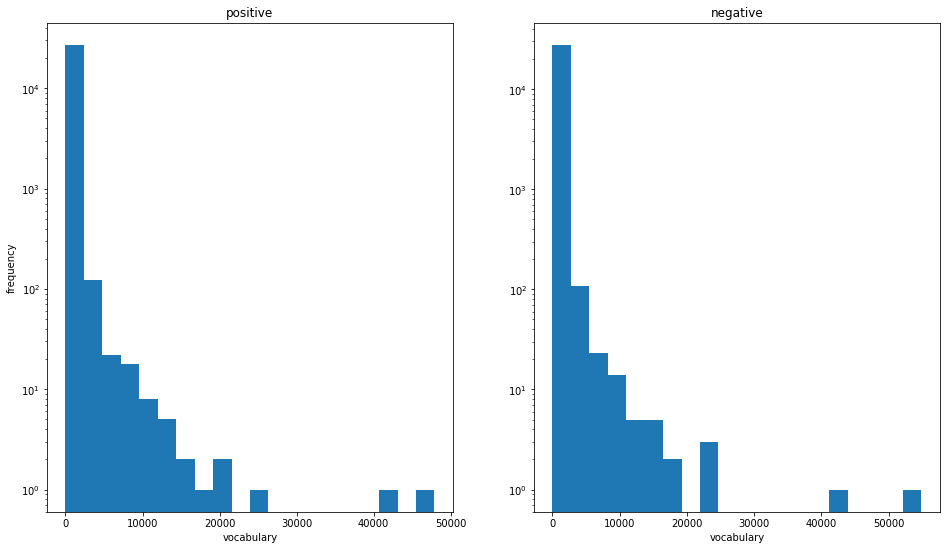

In [40]:
#visualizing
import matplotlib.pyplot as plt
from pylab import * 

#data
neg_data=mc_neg['freq'].tolist()
pos_data=mc_pos['freq'].tolist()

#figures 
plt.figure(figsize=(16,9)) 

subplot(1,2,1)
title('positive')
plt.ylabel('frequency')
plt.xlabel('vocabulary')
plt.hist(pos_data,log=True,bins=20)
 
subplot(1,2,2)

title('negative')
plt.hist(neg_data,log=True,bins=20)
plt.xlabel('vocabulary')
plt.axis('auto')
show()

#### the histogram is skewed to left  also not much can be concluded from histogram before feature selection and after , as the difference in word count is gigantic 


### this completes phase 3  lets move on to phase 4 on new notebook(Part 3)  for convinience 

---------------------------------